In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [89]:
def getBorderColor(img):
    
    border = np.asarray(img[0,:])
    border = np.concatenate((border, np.asarray(img[-1, :])))
    border = np.concatenate((border, np.asarray(img[:, 0])))
    border = np.concatenate((border, np.asarray(img[:, -1])))
    #print(border)
    #print(border)
    return np.bincount(border).argmax()

def pre_processing(img):
    #img_blurred = cv2.medianBlur(img,5)
    #img_binarized = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    _, img_binarized = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)    
    if(getBorderColor(img_binarized) != 0):
        img_binarized = cv2.bitwise_not(img_binarized) 
    #img_binarized = adaptiveThresh(img, t=15, div=8)
    return img_binarized

In [90]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(pre_processing(img))
    return images

In [91]:
#follow the ration 60% 20% 20%
TRAINING_SIZE = 114
VALIDATION_SIZE = 38
TEST_SIZE = 38

TRAINING_OFFSET = TRAINING_SIZE
VALIDATION_OFFSET = TRAINING_OFFSET + VALIDATION_SIZE

training_set = []
validation_set = []
test_set = []

for i in range (1, 10):
    class_i_images = load_images_from_folder("ACdata_base/" + str(i))
    training_set.append(class_i_images[0:TRAINING_OFFSET])
    validation_set.append(class_i_images[TRAINING_OFFSET: VALIDATION_OFFSET])
    test_set.append(class_i_images[VALIDATION_OFFSET:])

In [92]:

def showImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    #print(getBorderColor(img))
    #w, h = img.shape[:2]
    #print(cv2.countNonZero(img)/(w*h) * 100)


#arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
#getBorderColor(arr)

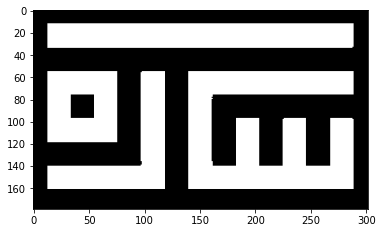

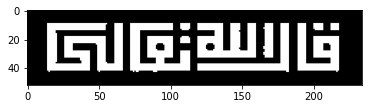

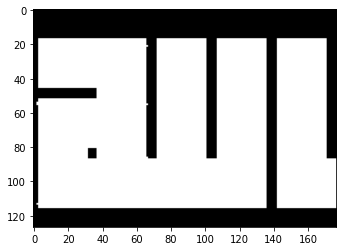

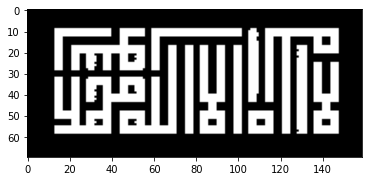

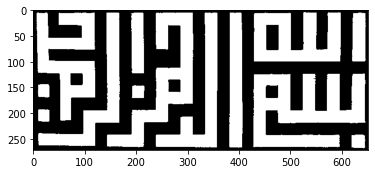

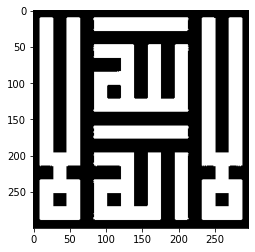

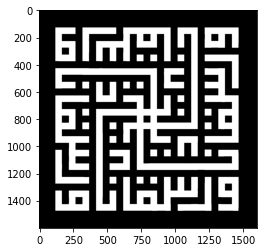

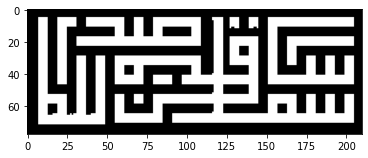

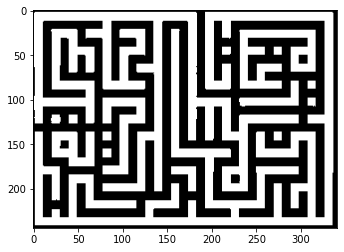

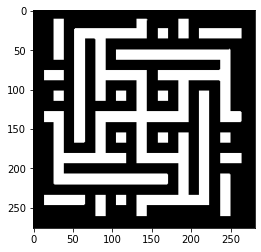

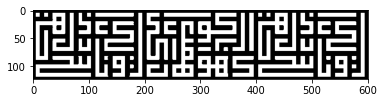

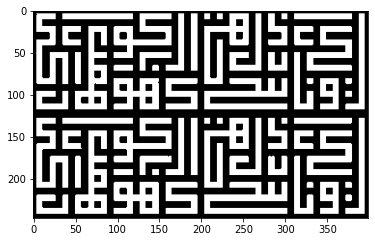

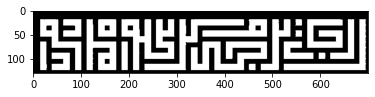

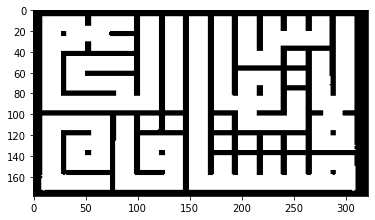

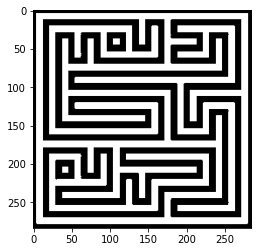

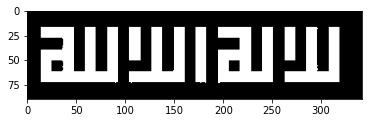

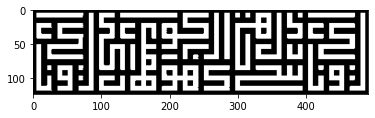

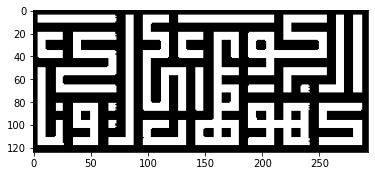

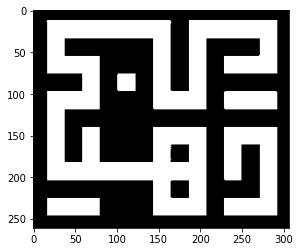

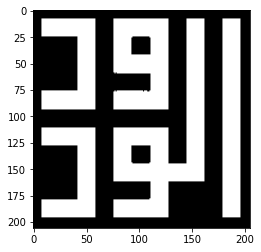

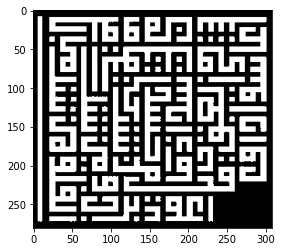

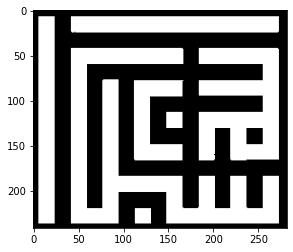

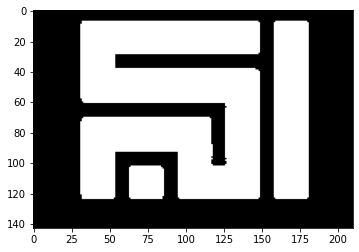

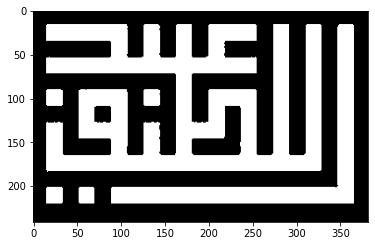

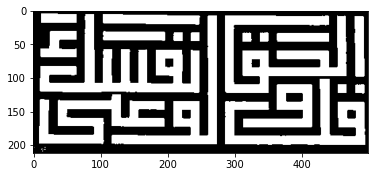

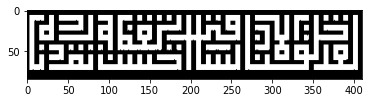

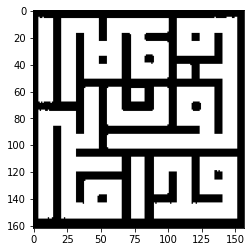

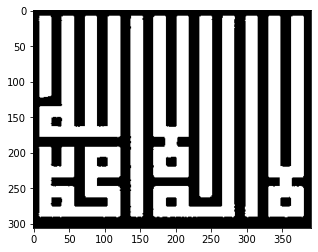

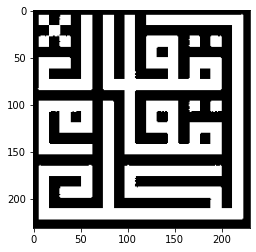

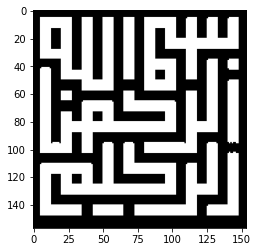

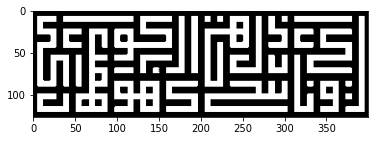

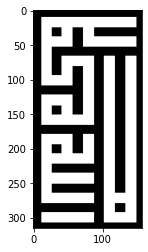

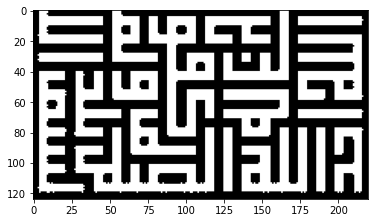

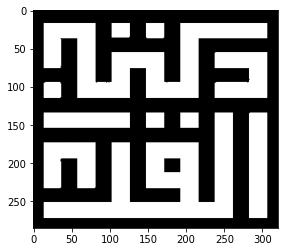

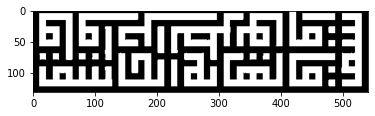

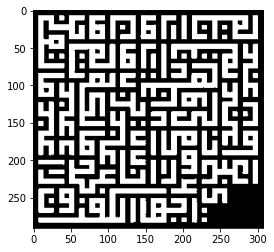

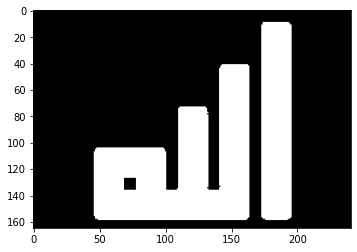

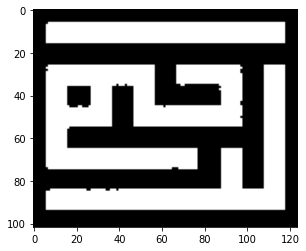

In [94]:
for i in range(len(test_set[8])):
    showImage(test_set[8][i])